In [9]:
import os
os.getcwd()

'C:\\Users\\soliy\\Documents\\solar-challenge-week1\\solar-challenge-week1\\notebooks\\Notebook'

In [11]:
import pandas as pd

df = pd.read_csv('../../data/benin-malanville.csv')  # go two levels up to reach project root, then into data/
df.describe()
df.isna().sum() / len(df)

Timestamp        0.0
GHI              0.0
DNI              0.0
DHI              0.0
ModA             0.0
ModB             0.0
Tamb             0.0
RH               0.0
WS               0.0
WSgust           0.0
WSstdev          0.0
WD               0.0
WDstdev          0.0
BP               0.0
Cleaning         0.0
Precipitation    0.0
TModA            0.0
TModB            0.0
Comments         1.0
dtype: float64

In [12]:
import pandas as pd

df = pd.read_csv('../../data/benin-malanville.csv')
df.head()

,Timestamp,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB,Comments
0,2021-08-09 00:01,-1.2,-0.2,-1.1,0.0,0.0,26.2,93.4,0.0,0.4,0.1,122.1,0.0,998,0,0.0,26.3,26.2,NaN
1,2021-08-09 00:02,-1.1,-0.2,-1.1,0.0,0.0,26.2,93.6,0.0,0.0,0.0,0.0,0.0,998,0,0.0,26.3,26.2,NaN
2,2021-08-09 00:03,-1.1,-0.2,-1.1,0.0,0.0,26.2,93.7,0.3,1.1,0.5,124.6,1.5,997,0,0.0,26.4,26.2,NaN
3,2021-08-09 00:04,-1.1,-0.1,-1.0,0.0,0.0,26.2,93.3,0.2,0.7,0.4,120.3,1.3,997,0,0.0,26.4,26.3,NaN
4,2021-08-09 00:05,-1.0,-0.1,-1.0,0.0,0.0,26.2,93.3,0.1,0.7,0.3,113.2,1.0,997,0,0.0,26.4,26.3,NaN


In [13]:
from scipy.stats import zscore

cols_to_check = ['GHI', 'DNI', 'DHI', 'ModA', 'ModB', 'WS', 'WSgust']
df[cols_to_check] = df[cols_to_check].apply(pd.to_numeric, errors='coerce')  # Handle bad strings

z_scores = np.abs(zscore(df[cols_to_check], nan_policy='omit'))
outliers = (z_scores > 3).any(axis=1)
df_outliers = df[outliers]
print(f"Total outliers: {df_outliers.shape[0]}")

Total outliers: 7740


In [15]:
# Fill missing with median
df_cleaned = df.copy()
for col in cols_to_check:
    median_val = df_cleaned[col].median()
    df_cleaned[col] = df_cleaned[col].fillna(median_val)


In [16]:
df_cleaned.to_csv('../../data/benin_clean.csv', index=False)

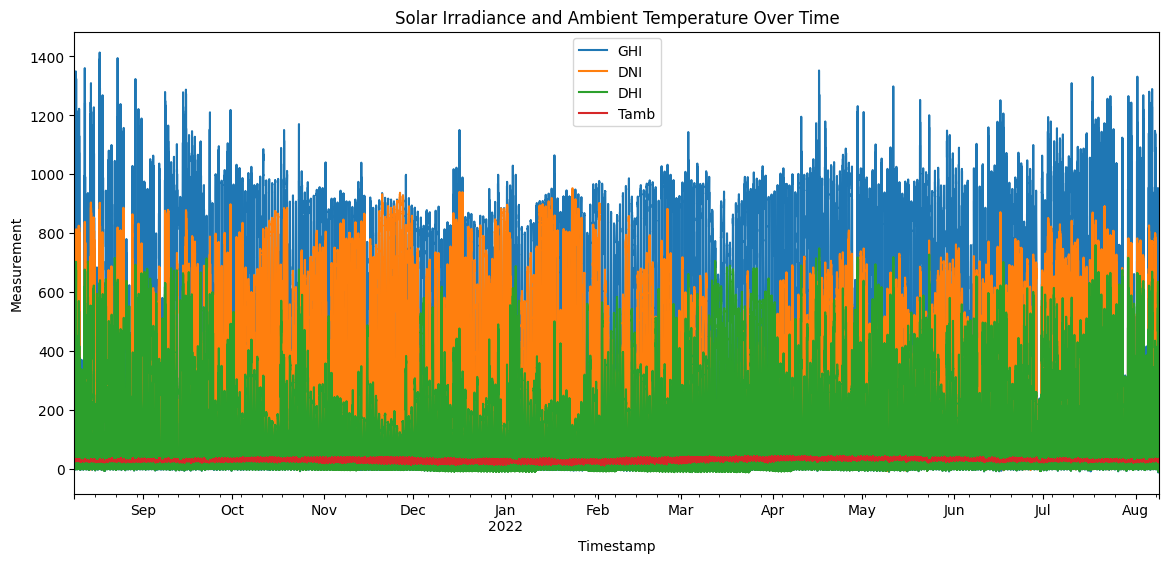

In [17]:
df_cleaned['Timestamp'] = pd.to_datetime(df_cleaned['Timestamp'])

# Plot solar irradiance over time
df_cleaned.set_index('Timestamp')[['GHI', 'DNI', 'DHI', 'Tamb']].plot(figsize=(14, 6))
plt.title("Solar Irradiance and Ambient Temperature Over Time")
plt.ylabel("Measurement")
plt.show()

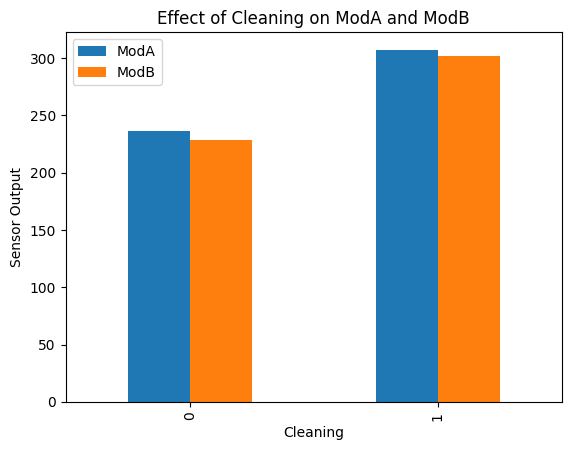

In [18]:
# Assuming there's a 'Cleaning' flag column
df_cleaned.groupby('Cleaning')[['ModA', 'ModB']].mean().plot(kind='bar')
plt.title("Effect of Cleaning on ModA and ModB")
plt.ylabel("Sensor Output")
plt.show()

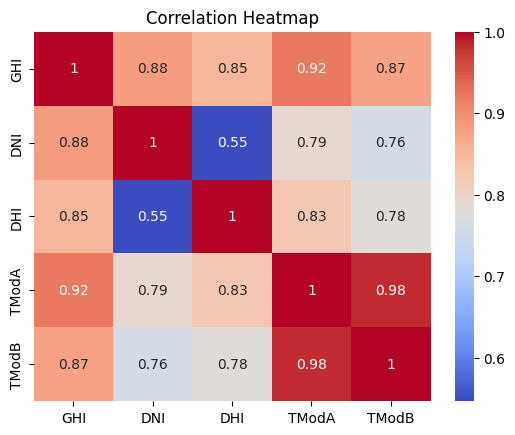

In [19]:
sns.heatmap(df_cleaned[['GHI', 'DNI', 'DHI', 'TModA', 'TModB']].corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

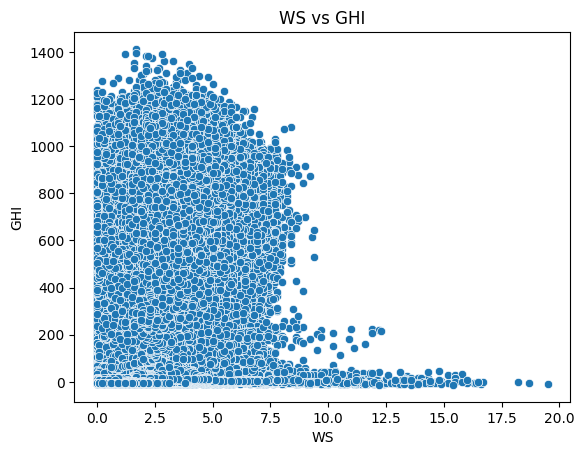

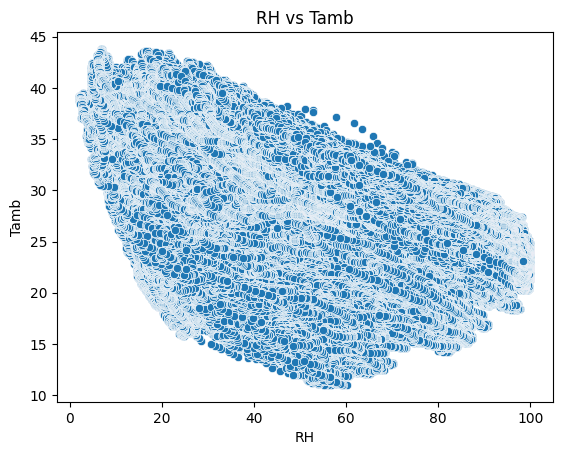

In [20]:
sns.scatterplot(x='WS', y='GHI', data=df_cleaned)
plt.title("WS vs GHI")
plt.show()

sns.scatterplot(x='RH', y='Tamb', data=df_cleaned)
plt.title("RH vs Tamb")
plt.show()

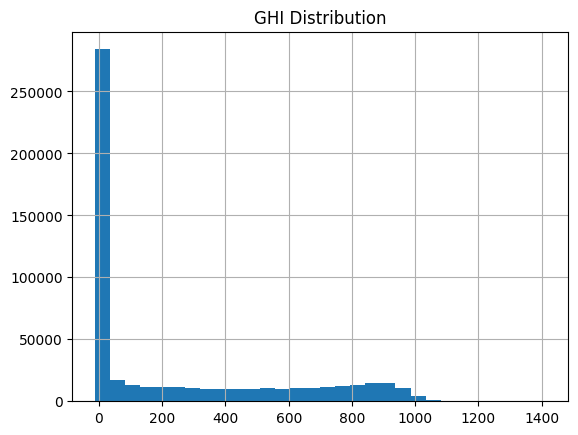

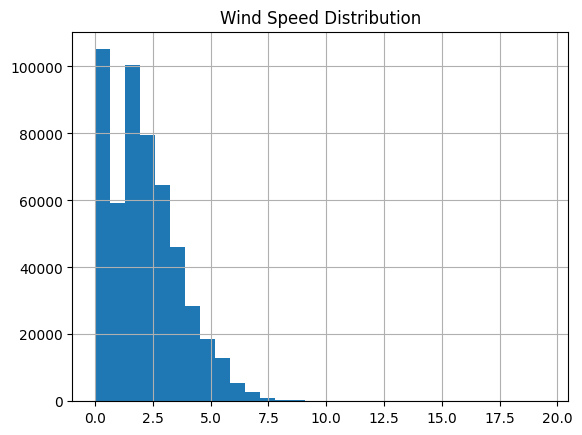

In [21]:
# Histogram
df_cleaned['GHI'].hist(bins=30)
plt.title("GHI Distribution")
plt.show()

df_cleaned['WS'].hist(bins=30)
plt.title("Wind Speed Distribution")
plt.show()

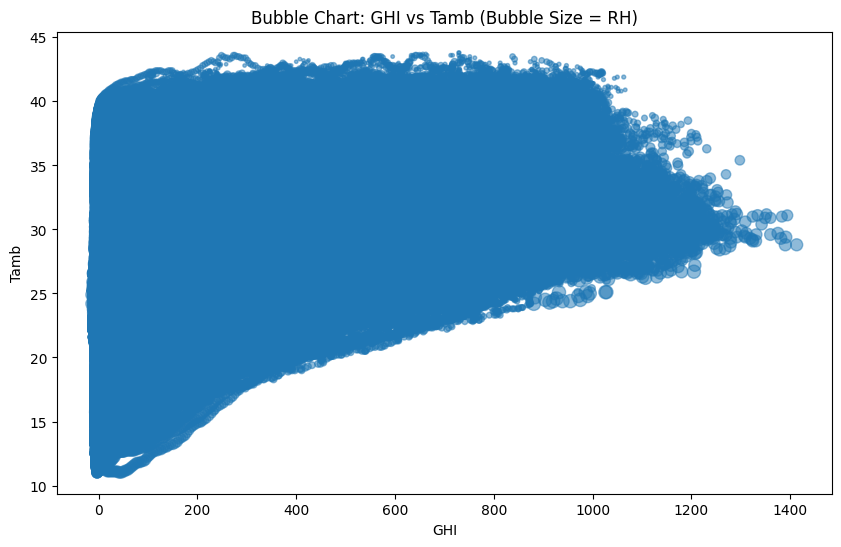

In [22]:
plt.figure(figsize=(10, 6))
plt.scatter(df_cleaned['GHI'], df_cleaned['Tamb'], s=df_cleaned['RH'], alpha=0.5)
plt.xlabel('GHI')
plt.ylabel('Tamb')
plt.title('Bubble Chart: GHI vs Tamb (Bubble Size = RH)')
plt.show()